In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
X=np.array([[1,2],
           [1.5,1.8],
           [5,8],
           [8,8],
           [1,0.6],
           [9, 11]])

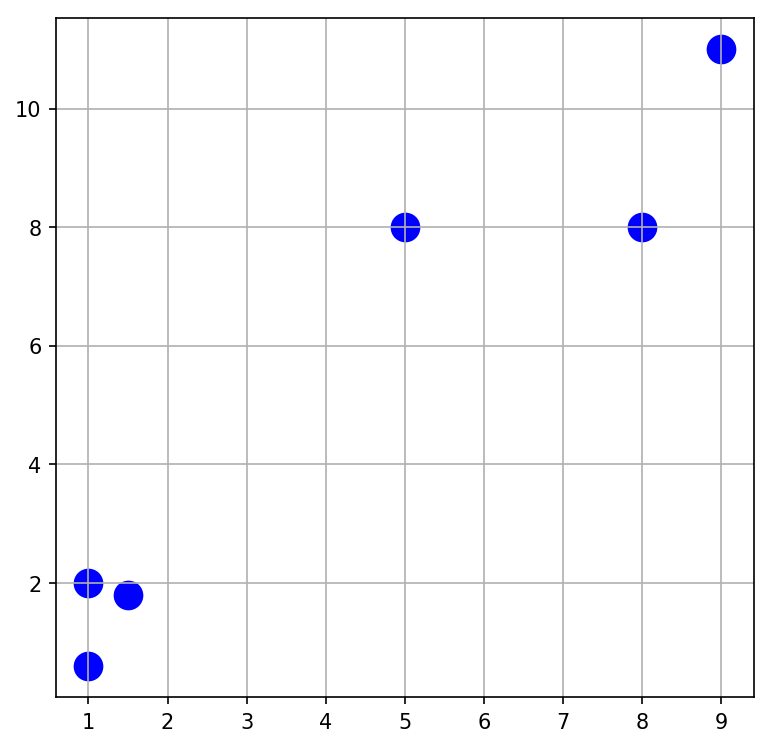

In [4]:
colors=['green','red','cyan','orange','gold','black']
fig = plt.figure(figsize=(6,6), dpi=150, facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)
ax.scatter(X[:,0],X[:,1],s=150, lw=2, c='blue')
ax.grid(True)

In [13]:
class K_Means:
    
    def __init__(self, k=2, tol=0.0001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter=max_iter
        
    def fit(self,data):
        
        self.centroids={}
        

        for i in range(self.k):
            self.centroids[i] = data[i] # first guess
        
        for i in range(self.max_iter):
            self.classifications = {}
            
            for j in range(self.k):
                self.classifications[j]=[]
                
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids) # dict() is required to make sure that a new dictionary that is not 
                                                  # associated with the original dictionary is produced
            
            for classification in self.classifications:
                # updating centroids
                # the new centroid is the average of the previuosly classified ones as to belong to the previous class
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            
            optimized = True
        
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_cetroid = self.centroids[c]
                if np.sum((current_cetroid-original_centroid)/original_centroid*100) > self.tol:
                    optimized = False
                    
            if optimized:
                break
        
    
    def predict(self,data_):
        
        distances = [np.linalg.norm(data_-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
        

In [20]:
clf = K_Means(k=2, tol=0.00001, max_iter=500)
clf.fit(X)

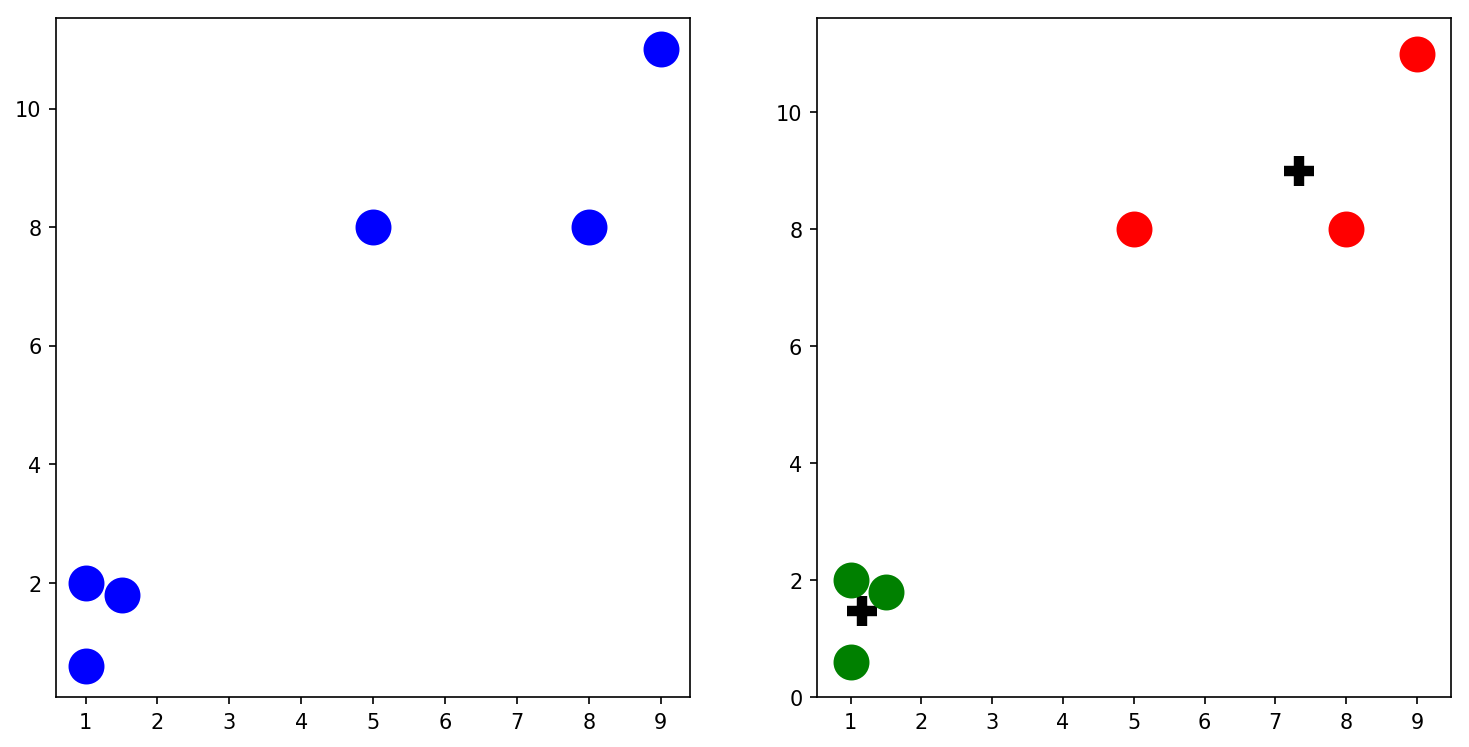

In [21]:
fig = plt.figure(figsize=(12,6), dpi=150, facecolor='w', edgecolor='k')

ax=fig.add_subplot(121)
ax.scatter(X[:,0],X[:,1],s=150, lw=5, color='blue',marker='o')

ax=fig.add_subplot(122)
for centroid in clf.centroids:
    ax.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], 
               marker='+', color='k', s=200, lw=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(featureset[0],featureset[1],color=color,marker='o', s=150, lw=5)
        

In [8]:
Unkowns=np.array([[2,2],
                 [8,10],
                 [4, 6],
                 [3.5,4],
                 [6,4]])

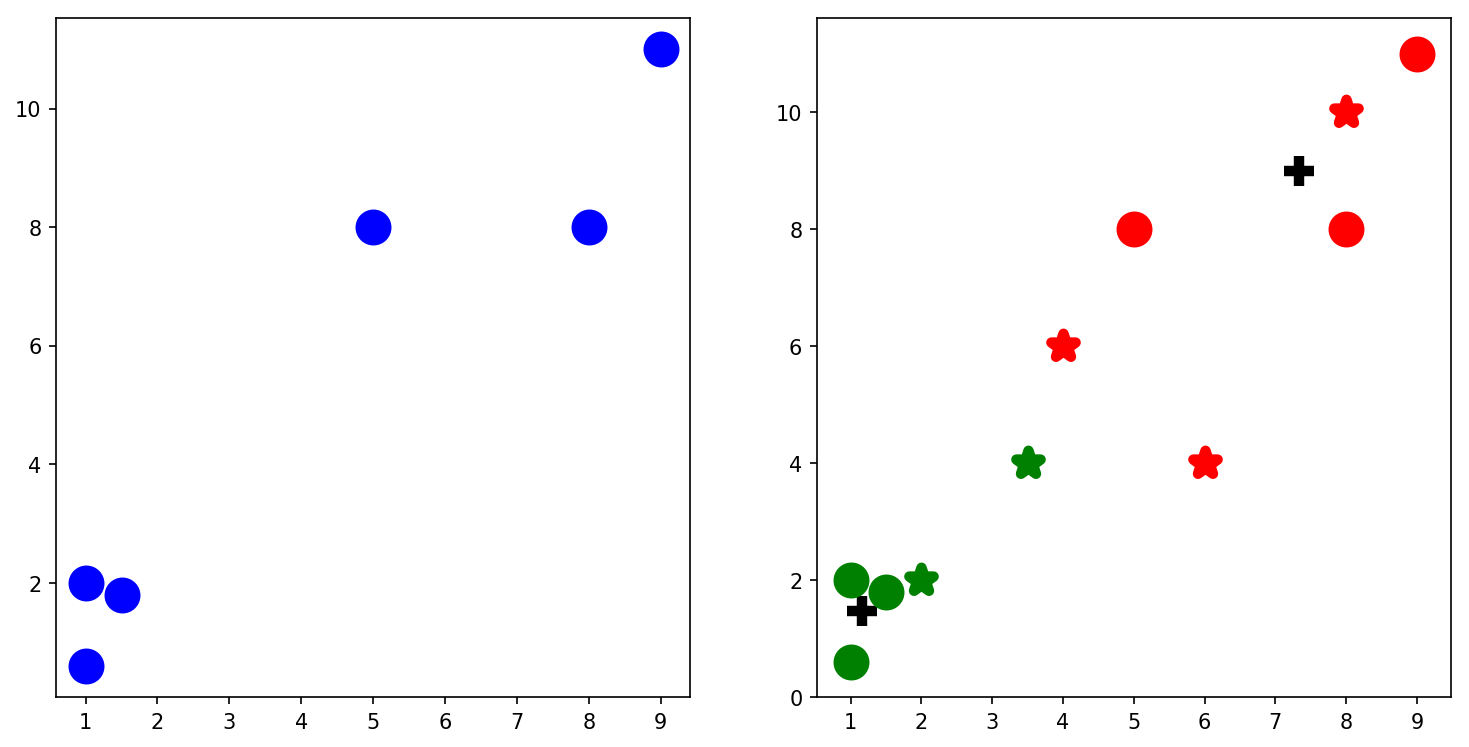

In [9]:
fig = plt.figure(figsize=(12,6), dpi=150, facecolor='w', edgecolor='k')

ax=fig.add_subplot(121)
ax.scatter(X[:,0],X[:,1],s=150, lw=5, color='blue',marker='o')

ax=fig.add_subplot(122)
for centroid in clf.centroids:
    ax.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], 
               marker='+', color='k', s=200, lw=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(featureset[0],featureset[1],color=color,marker='o', s=150, lw=5)
        

for unkonwn in Unkowns:
    classification=clf.predict(unkonwn)
    ax.scatter(unkonwn[0],unkonwn[1],color=colors[classification],marker='*', s=150, lw=5)

# Addings the unkwons to the training set

In [10]:
Y = np.append(X,Unkowns, axis=0)

In [11]:
clf = K_Means(k=3, tol=0.00001, max_iter=500)
clf.fit(Y)

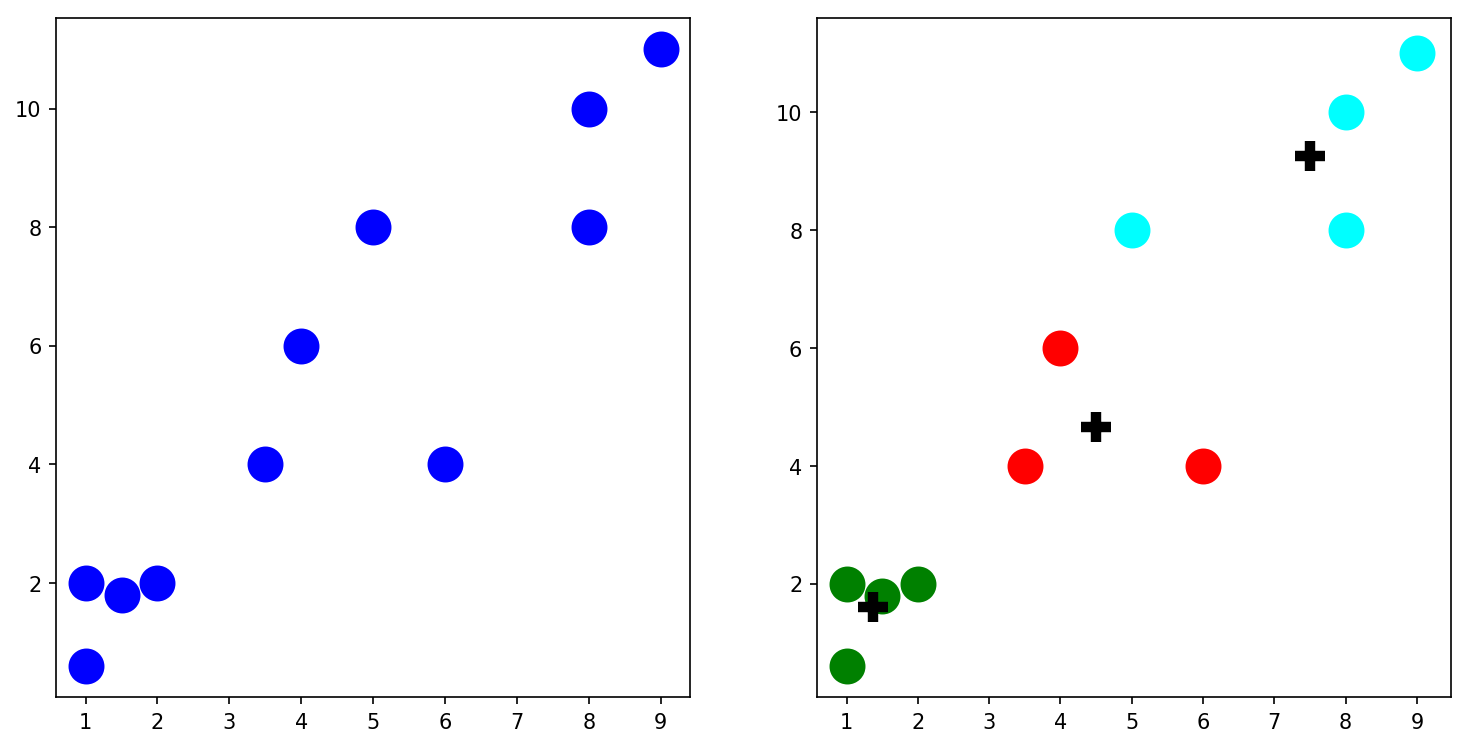

In [12]:
fig = plt.figure(figsize=(12,6), dpi=150, facecolor='w', edgecolor='k')

ax=fig.add_subplot(121)
ax.scatter(Y[:,0],Y[:,1],s=150, lw=5, color='blue',marker='o')

ax=fig.add_subplot(122)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(featureset[0],featureset[1],color=color,marker='o', s=150, lw=5)
        
for centroid in clf.centroids:
    ax.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], 
               marker='+', color='k', s=200, lw=5)
